# Traders@MIT Data Science Case 2024

You are a member of the fictional trading arm of Traders@MIT, and you are asked to present evidence that some hand-crafted signals can be used to create a profitable trading strategy. To do this, you will construct a trading strategy in the form of a `python` function. You will be given a small amount of data to train your models, and you will be evaluated on a large hidden dataset. Your objective is to maximize the t-statistic of your trading strategy.

More technical details are provided below:

You are given a training dataset (`"train.csv"`) which is a DataFrame with `200` rows, each representing a different moment in time. Each row has some number of columns labeled "regressor{i}" or "target{i}". For each row, "regressor{i}" represents the value of the $i$'th signal for the given tick. "target{i}" represents the return of the $i$'th stock, meaning if your position in stock $i$ is $\$X$ for the given tick, your PNL for that tick is $\$X \cdot \text{target\{i\}}$. You can use this dataset to learn how to predict the stock movements given your feature set.

You will write a `python` function called `strategy` which takes as input *only* the regressors in a row in a DataFrame, and returns as output a list-like object with the same length as the number of stocks. The output represents the dollar positions you wish to acquire in each stock, and they can be any real number. You may assume that you have no market impact, no trading costs, etc. Your submitted function will run on every row of the hidden DataFrame, and your score will be t-statistic of your PNL over all the ticks. A copy of the code that computes this score for the training set and an example trading strategy are provided below.

It is guaranteed that each tick is an independent generation of the same statistical process.

Please do not try to abuse floating point calculations (any `inf` scores will be turned into `0`). On that note, also make sure your code won't crash and will run under `10` seconds on `200,000` DataFrame rows and under `1` second on `200` DataFrame rows. Your function should also not remember things between calls. You are free to explore the dataset however you like, but your submission must only import from `numpy` and `pandas`. Feel free to omit `numpy` and `pandas` imports in your submission as they are imported as `np` and `pd` respectively automatically.

In [ ]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [ ]:
def tstat(returns):
    returns = np.array(returns)
    return np.mean(returns)/np.std(returns,ddof=1)*np.sqrt(len(returns))

In [ ]:
def score_trading_strategy(test_df, strategy_fn, score_fn=tstat):
    """
    test_df: pd.Dataframe where columns are named "regressor{i}" or "target{i}"
    strategy_fn: (row of test_df) -> [positions in each stock]
    score_fn: (list of returns) -> (scalar)
    """
    targets = [col for col in test_df if col.startswith("target")]
    X_df = test_df.drop(columns=targets)
    y_df = test_df[targets]

    positions = X_df.apply(strategy_fn, axis=1)
    returns = [np.dot(y_df.iloc[idx],pos) for idx,pos in enumerate(positions)]

    return score_fn(returns)

## Your Code Here:

In [ ]:
import pandas as pd
df = pd.read_csv("test.csv")
df.head()

,Unnamed: 0,regressor1,regressor2,target1,target2
0,0,-0.153756,-0.061955,0.007751,0.014433
1,1,0.811820,0.773248,-0.015753,0.029260
2,2,-0.391755,-0.376271,-0.033269,-0.098170
3,3,-0.407406,-0.039474,-0.020156,-0.097499
4,4,0.473574,-0.457490,-0.001229,0.025068


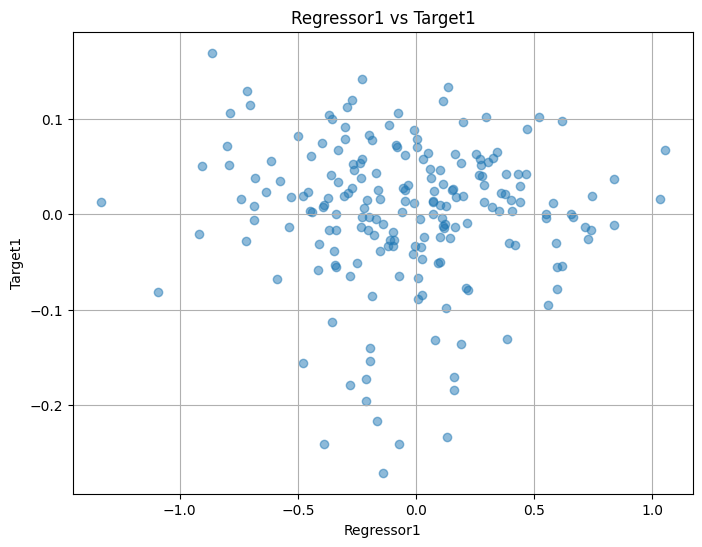

In [ ]:
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.scatter(df['regressor1'], df['target1'], alpha=0.5)  # Create scatter plot
plt.title('Regressor1 vs Target1')
plt.xlabel('Regressor1')
plt.ylabel('Target1')
plt.grid(True)  # Add gridlines
plt.show()

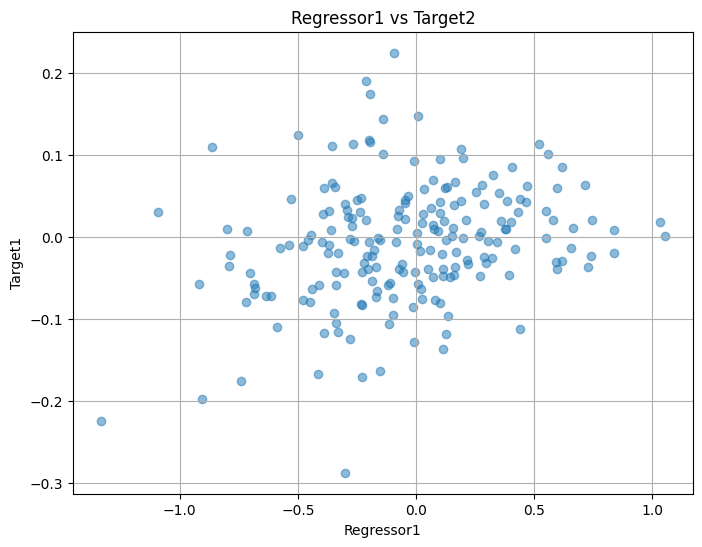

In [ ]:
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.scatter(df['regressor1'], df['target2'], alpha=0.5)  # Create scatter plot
plt.title('Regressor1 vs Target2')
plt.xlabel('Regressor1')
plt.ylabel('Target1')
plt.grid(True)  # Add gridlines
plt.show()

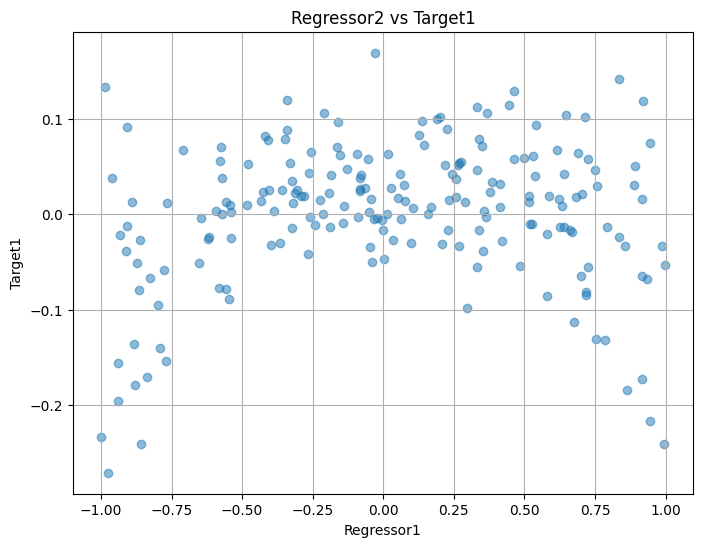

In [ ]:
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.scatter(df['regressor2'], df['target1'], alpha=0.5)  # Create scatter plot
plt.title('Regressor2 vs Target1')
plt.xlabel('Regressor1')
plt.ylabel('Target1')
plt.grid(True)  # Add gridlines
plt.show()

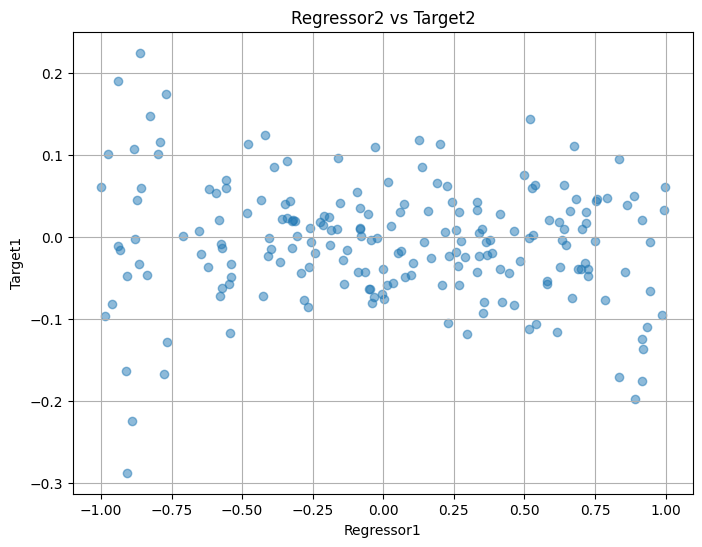

In [ ]:
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.scatter(df['regressor2'], df['target2'], alpha=0.5)  # Create scatter plot
plt.title('Regressor2 vs Target2')
plt.xlabel('Regressor1')
plt.ylabel('Target1')
plt.grid(True)  # Add gridlines
plt.show()

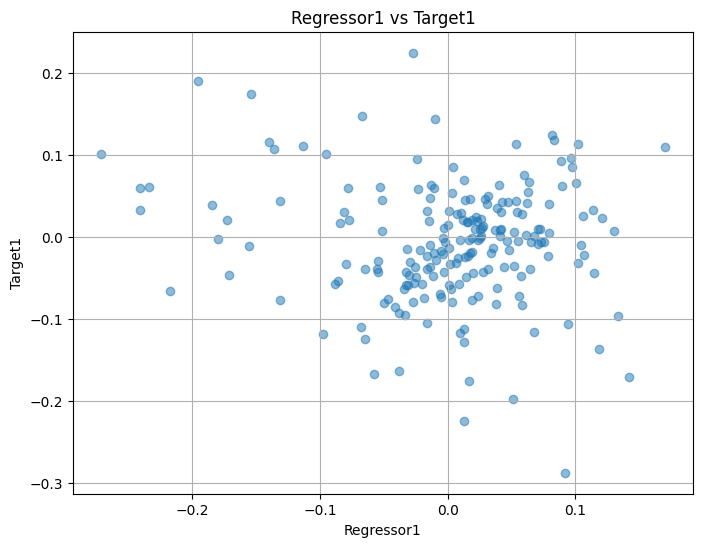

In [ ]:
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.scatter(df['target1'], df['target2'], alpha=0.5)  # Create scatter plot
plt.title('Regressor1 vs Target1')
plt.xlabel('Regressor1')
plt.ylabel('Target1')
plt.grid(True)  # Add gridlines
plt.show()

### OUR STRATEGY FUNCTION

In [ ]:
from sklearn.linear_model import LinearRegression

# Model 1: Regressor1 -> Target2
model_reg1_target2 = LinearRegression()
model_reg1_target2.fit(df[['regressor1']], df['target2'])

# Model 2: Regressor2 -> Target1
model_reg2_target1 = LinearRegression()
model_reg2_target1.fit(df[['regressor2']], df['target1'])

# Extract and display coefficients and intercepts for both models
reg1_target2_coef = model_reg1_target2.coef_.item()
reg1_target2_intercept = model_reg1_target2.intercept_

reg2_target1_coef = model_reg2_target1.coef_.item()
reg2_target1_intercept = model_reg2_target1.intercept_

{
    'Model (Regressor1 -> Target2)': {'Coefficient': reg1_target2_coef, 'Intercept': reg1_target2_intercept},
    'Model (Regressor2 -> Target1)': {'Coefficient': reg2_target1_coef, 'Intercept': reg2_target1_intercept}
}

{'Model (Regressor1 -> Target2)': {'Coefficient': 0.04558156224676176,
  'Intercept': -0.004890587410683419},
 'Model (Regressor2 -> Target1)': {'Coefficient': 0.019331314198687853,
  'Intercept': 0.00044513934497382066}}

In [ ]:
import numpy as np

# Define the trading strategy function using the regression models
def strategy(row):
    """
    row: a row of a DataFrame containing the regressors only
    """
    # Calculate signals using the regression models
    signal_target2 = reg1_target2_coef * row['regressor1'] + reg1_target2_intercept
    signal_target1 = reg2_target1_coef * row['regressor2'] + reg2_target1_intercept

    # Position based on the sign of the signals
    position_target1 = np.sign(signal_target1)  # Long if positive, short if negative
    position_target2 = np.sign(signal_target2)  # Long if positive, short if negative

    return [position_target1, position_target2]

In [ ]:
score_trading_strategy(df, strategy)

2.6408832134260276

In [ ]:
def strategy_weighted(row):
    """
    Trading strategy with signal weighting.
    row: a row of a DataFrame containing the regressors only
    """
    # Calculate signals using the regression models
    signal_target2 = reg1_target2_coef * row['regressor1'] + reg1_target2_intercept
    signal_target1 = reg2_target1_coef * row['regressor2'] + reg2_target1_intercept

    # Scale positions based on signal magnitudes
    position_target1 = signal_target1  # Larger positions if the signal is stronger
    position_target2 = signal_target2  # Larger positions if the signal is stronger

    return [position_target1, position_target2]

# Evaluate the weighted strategy
score_weighted = score_trading_strategy(df, strategy_weighted)
score_weighted


3.5205360347081163

### POLYNOMIAL REGRESSION (submitted)

In [ ]:
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import BayesianRidge
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error
import numpy as np

# # Prepare the data
# X = df[['regressor1', 'regressor2']]
# y_target1 = df['target1']
# y_target2 = df['target2']

# # Split the data into training and testing sets for each target
# X_train, X_test, y_train_target1, y_test_target1 = train_test_split(X, y_target1, test_size=0.2, random_state=42)
# _, _, y_train_target2, y_test_target2 = train_test_split(X, y_target2, test_size=0.2, random_state=42)

# # Apply polynomial transformation (e.g., degree=2)
# poly = PolynomialFeatures(degree=2, include_bias=False)
# X_train_poly = poly.fit_transform(X_train)
# X_test_poly = poly.transform(X_test)


# # Bayesian Ridge model for Target1 with polynomial features
# bayesian_ridge_poly_target1 = BayesianRidge()
# bayesian_ridge_poly_target1.fit(X_train_poly, y_train_target1)

# # Bayesian Ridge model for Target2 with polynomial features
# bayesian_ridge_poly_target2 = BayesianRidge()
# bayesian_ridge_poly_target2.fit(X_train_poly, y_train_target2)

# # Predict on the test set and calculate Mean Squared Error for evaluation
# y_pred_target1 = bayesian_ridge_poly_target1.predict(X_test_poly)
# mse_target1 = mean_squared_error(y_test_target1, y_pred_target1)

# y_pred_target2 = bayesian_ridge_poly_target2.predict(X_test_poly)
# mse_target2 = mean_squared_error(y_test_target2, y_pred_target2)

# # Display the Mean Squared Error for both targets
# mse_target1, mse_target2

# # Extract coefficients and intercept for target1 model
# coeffs_target1 = bayesian_ridge_poly_target1.coef_
# intercept_target1 = bayesian_ridge_poly_target1.intercept_

# # Extract coefficients and intercept for target2 model
# coeffs_target2 = bayesian_ridge_poly_target2.coef_
# intercept_target2 = bayesian_ridge_poly_target2.intercept_

# # Display the coefficients and intercepts for both models
# print("Coefficients for target1:", coeffs_target1)
# print("Intercept for target1:", intercept_target1)
# print("Coefficients for target2:", coeffs_target2)
# print("Intercept for target2:", intercept_target2)

df = pd.read_csv("test.csv")

def strategy(row):

    reg1 = row['regressor1']
    reg2 = row['regressor2']

    poly_features = [
        reg1,              # regressor1
        reg2,              # regressor2
        reg1 ** 2,         # regressor1^2
        reg1 * reg2,       # regressor1 * regressor2
        reg2 ** 2          # regressor2^2
    ]

    coeffs_target1 = [-0.01585593, 0.01859741, 0.02307204, 0.00636276, -0.09486392]
    intercept_target1 = 0.02831850168426823

    coeffs_target2 = [0.03196336, -0.01192044, -0.01492917, -0.0101935, -0.02736977]
    intercept_target2 = 0.003065229203404308

    signal_target1 = np.dot(coeffs_target1, poly_features) + intercept_target1
    signal_target2 = np.dot(coeffs_target2, poly_features) + intercept_target2

    position_target1 = signal_target1
    position_target2 = signal_target2

    return [position_target1, position_target2]



# Example usage to evaluate the strategy
score_bayesian_ridge_poly_hardcoded = score_trading_strategy(df, strategy)
score_bayesian_ridge_poly_hardcoded



# Evaluate the Bayesian Ridge strategy with polynomial features
score_bayesian_ridge_poly = score_trading_strategy(df, strategy)
score_bayesian_ridge_poly


59.988008762902616

In [ ]:
import time

def strategy_bayesian_ridge_poly(row):

    global total_time

    start_time = time.time()

    # Extract regressor values from the row
    x1 = row['regressor1']
    x2 = row['regressor2']

    # Manually compute polynomial features (degree=2)
    poly_features = np.array([x1, x2, x1**2, x1 * x2, x2**2])

    # Hardcoded coefficients and intercepts for target1
    coef_target1 = np.array([4.11125909e-03, -1.33683044e-03, 7.68565248e-05, -5.33792165e-03, -1.24553444e-01])
    intercept_target1 = 0.04048878366025904

    # Hardcoded coefficients and intercepts for target2
    coef_target2 = np.array([0.04595267, -0.00037011, -0.00389909, 0.00159238, 0.00382586])
    intercept_target2 = -6.367984781966763e-05

    # Calculate predictions manually for each target
    signal_target1 = np.dot(poly_features, coef_target1) + intercept_target1
    signal_target2 = np.dot(poly_features, coef_target2) + intercept_target2

    # Use the predictions as positions directly
    position_target1 = signal_target1
    position_target2 = signal_target2

    end_time = time.time()
    total_time += end_time - start_time

    return [position_target1, position_target2]



# Evaluate the Bayesian Ridge strategy with polynomial features
score_bayesian_ridge_poly = score_trading_strategy(df, strategy_bayesian_ridge_poly)
print(total_time)
score_bayesian_ridge_poly


1.1715106964111328


63.4278686817507

In [ ]:
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

# df = pd.read_csv("test.csv")

# Prepare the data
X = df[['regressor1', 'regressor2']]
y_target1 = df['target1']
y_target2 = df['target2']

# Split the data into training and testing sets for each target
X_train, X_test, y_train_target1, y_test_target1 = train_test_split(X, y_target1, test_size=0.2, random_state=42)
_, _, y_train_target2, y_test_target2 = train_test_split(X, y_target2, test_size=0.2, random_state=42)

# Apply polynomial transformation for Ridge (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Ridge regression models (with polynomial features) for target1 and target2
ridge_target1 = Ridge(alpha=1.0)  # Adjust alpha as needed
ridge_target1.fit(X_train_poly, y_train_target1)

ridge_target2 = Ridge(alpha=1.0)
ridge_target2.fit(X_train_poly, y_train_target2)

# XGBoost models for target1 and target2
xgb_target1 = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_target1.fit(X_train, y_train_target1)

xgb_target2 = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_target2.fit(X_train, y_train_target2)

# Generate predictions from XGBoost models on the training data
xgb_pred_train_target1 = xgb_target1.predict(X_train)
xgb_pred_train_target2 = xgb_target2.predict(X_train)

# Fit linear regression models to approximate XGBoost predictions
linear_approx_xgb_target1 = LinearRegression().fit(X_train, xgb_pred_train_target1)
linear_approx_xgb_target2 = LinearRegression().fit(X_train, xgb_pred_train_target2)

# Extract coefficients and intercepts from the linear approximations
xgb_coef_target1 = linear_approx_xgb_target1.coef_
xgb_intercept_target1 = linear_approx_xgb_target1.intercept_

xgb_coef_target2 = linear_approx_xgb_target2.coef_
xgb_intercept_target2 = linear_approx_xgb_target2.intercept_



import numpy as np
import pandas as pd

def strategy_ensemble_hardcoded(row):
    """
    Trading strategy using a hardcoded ensemble of Ridge regression and approximated XGBoost models.

    Parameters:
    - row: A pandas Series containing 'regressor1' and 'regressor2'.

    Returns:
    - A list containing positions for target1 and target2.
    """
    # Extract regressor values
    reg1 = row['regressor1']
    reg2 = row['regressor2']

    # Compute polynomial features (degree=2, no bias)
    reg1_sq = reg1 ** 2
    reg2_sq = reg2 ** 2
    reg1_reg2 = reg1 * reg2

    # --- Ridge Regression Predictions ---

    # Ridge Regression - Target 1
    ridge_t1 = (
        (-0.01653705266719767 * reg1) +
        (0.018697754616366385 * reg2) +
        (0.024952090817992087 * reg1_sq) +
        (0.0069559910196203955 * reg1_reg2) +
        (-0.10082508931830626 * reg2_sq) +
        0.02967905013390302  # Intercept
    )

    # Ridge Regression - Target 2
    ridge_t2 = (
        (0.03795037285190827 * reg1) +
        (-0.013976992718397517 * reg2) +
        (-0.020489656608652426 * reg1_sq) +
        (-0.018788496745877407 * reg1_reg2) +
        (-0.03877884760135926 * reg2_sq) +
        0.007362388505646633  # Intercept
    )

    # --- XGBoost Approximated Predictions ---

    # XGBoost Approximation - Target 1
    xgb_t1 = (
        (-0.012571663094930944 * reg1) +
        (0.02304124420573102 * reg2) +
        0.00528375409185022  # Intercept
    )

    # XGBoost Approximation - Target 2
    xgb_t2 = (
        (0.04268794672087465 * reg1) +
        (-0.012446562165558084 * reg2) +
        (-0.007068371393421493)  # Intercept
    )

    # --- Ensemble Signals ---

    # Average the Ridge and XGBoost predictions
    ensemble_t1 = (ridge_t1 + xgb_t1) / 2
    ensemble_t2 = (ridge_t2 + xgb_t2) / 2

    # Assign positions based on ensemble signals
    position_target1 = ensemble_t1
    position_target2 = ensemble_t2

    return [position_target1, position_target2]



# Evaluate the ensemble strategy using the score_trading_strategy function
score_ensemble = score_trading_strategy(df, strategy_ensemble_hardcoded)
score_ensemble


50.399842098360146

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Prepare the data
X = df[['regressor1', 'regressor2']]
y_target1 = df['target1']
y_target2 = df['target2']

# Split the data into training and testing sets for each target
X_train, X_test, y_train_target1, y_test_target1 = train_test_split(X, y_target1, test_size=0.2, random_state=42)
_, _, y_train_target2, y_test_target2 = train_test_split(X, y_target2, test_size=0.2, random_state=42)

# Random Forest model for target1
rf_target1 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_target1.fit(X_train, y_train_target1)

# Random Forest model for target2
rf_target2 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_target2.fit(X_train, y_train_target2)

# Predict on the test set and calculate MSE for evaluation
y_pred_target1 = rf_target1.predict(X_test)
mse_target1 = mean_squared_error(y_test_target1, y_pred_target1)

y_pred_target2 = rf_target2.predict(X_test)
mse_target2 = mean_squared_error(y_test_target2, y_pred_target2)

# Display the Mean Squared Error for both targets
mse_target1, mse_target2

def strategy_random_forest(row):
    """
    Trading strategy using Random Forest model predictions.
    row: a row of a DataFrame containing the regressors only
    """
    # Convert the row to a DataFrame to maintain feature names
    row_df = pd.DataFrame([row])

    # Calculate signals using Random Forest models
    signal_target1 = rf_target1.predict(row_df[['regressor1', 'regressor2']])[0]  # Prediction for target1
    signal_target2 = rf_target2.predict(row_df[['regressor1', 'regressor2']])[0]  # Prediction for target2

    # Use the signal values directly as positions
    position_target1 = signal_target1
    position_target2 = signal_target2

    return [position_target1, position_target2]


# Evaluate the strategy using the score_trading_strategy function
score_rf = score_trading_strategy(df, strategy_random_forest)
score_rf


79.6518444854196

### Example Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(df[["regressor1"]], df["target1"])

print(model.coef_, model.intercept_)

[-0.00749641] 0.0007732869385021894


In [ ]:
def strategy(row):
    """
    row: a row of a DataFrame, only indexable by "regressor1" and "regressor2"
    """
    # Note that you will have to hard code coefficients when you make an actual submission
    signal_1 = model.coef_.item() * row["regressor1"] + model.intercept_
    signal_2 = 0

    # This strategy buys or sells depending on the signal given by the linear model, but doesn't vary sizing
    return [np.sign(signal_1), np.sign(signal_2)]

In [ ]:
score_trading_strategy(df, strategy)

-0.19975430415983894